<a href="https://colab.research.google.com/github/venkidev21/23it060-AIML-Assignment-/blob/main/Aiml060(rf).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

RANDOM FOREST

In [1]:
import pandas as pd
from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

<Figure size 640x480 with 0 Axes>

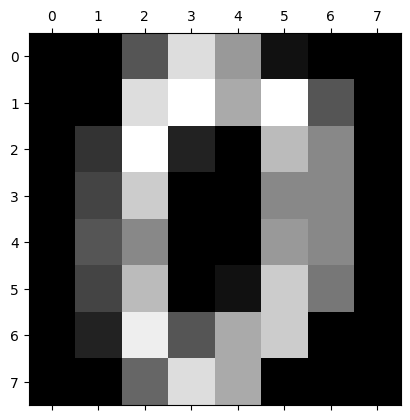

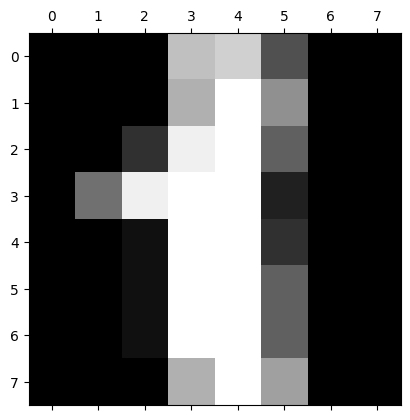

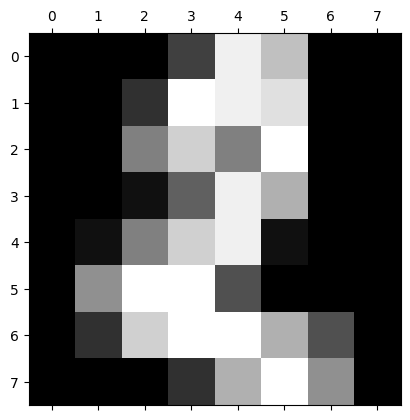

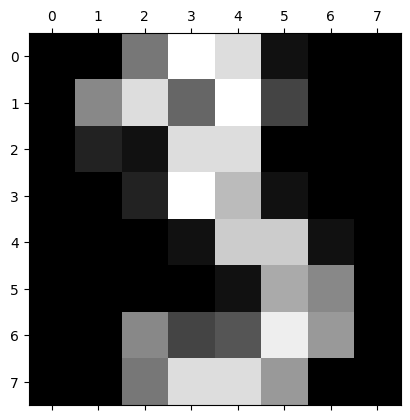

In [5]:
plt.gray()
for i in range(4):
    plt.matshow(digits.images[i])

In [6]:
df = pd.DataFrame(digits.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [8]:
df['target'] = digits.target

In [10]:
df[0:12]

X = df.drop('target',axis='columns')
y = df.target

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=60)

In [12]:
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=60)

In [13]:
model.score(X_test, y_test)

0.9666666666666667

In [14]:
y_predicted = model.predict(X_test)

In [15]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[38,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 32,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 36,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 42,  0,  1,  0,  1,  0,  0],
       [ 0,  0,  0,  0, 41,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 31,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0, 32,  0,  1,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 28,  0,  0],
       [ 0,  1,  1,  0,  0,  0,  0,  0, 35,  0],
       [ 0,  0,  0,  1,  0,  1,  0,  0,  1, 33]])

Text(95.72222222222221, 0.5, 'Truth')

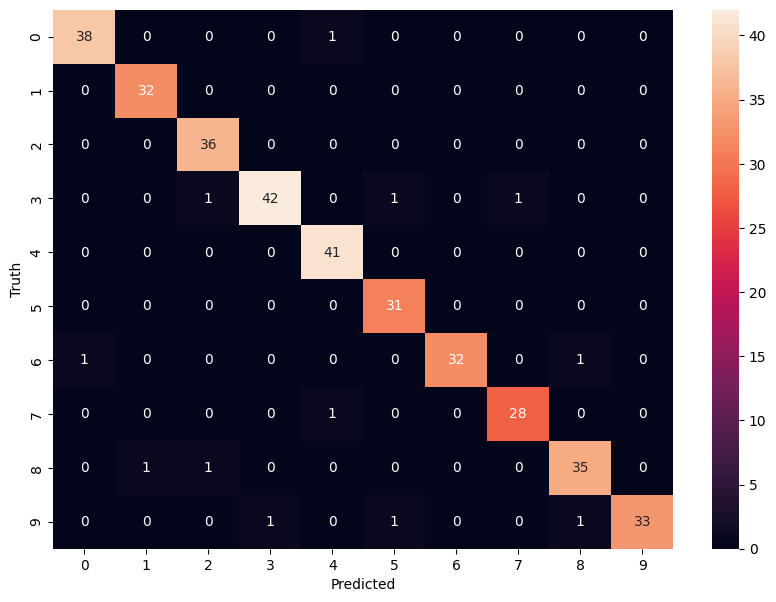

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [19]:
from sklearn.datasets import load_iris
iris = load_iris()

In [20]:
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [21]:
from sklearn.ensemble import RandomForestClassifier
model_default = RandomForestClassifier(n_estimators=10)
model_default.fit(X_train, y_train)
default_score = model_default.score(X_test, y_test)

In [22]:
scores = []
n_estimators_list = range(10, 201, 20)

for n in n_estimators_list:
    model = RandomForestClassifier(n_estimators=n)
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    scores.append(score)

In [23]:
best_score = max(scores)
best_n_estimators_index = scores.index(best_score)
best_n_estimators = n_estimators_list[best_n_estimators_index]

In [24]:
print(f"Score with default n_estimators (10): {default_score}")
print(f"Best score achieved during fine-tuning: {best_score}")
print(f"Number of estimators for the best score: {best_n_estimators}")

Score with default n_estimators (10): 0.9333333333333333
Best score achieved during fine-tuning: 0.9333333333333333
Number of estimators for the best score: 10
